# Gulf of Maine tidal prediction using harmonics from FVCOM-GoM

In [1]:
import numpy as np
import pandas as pd
import scipy.io
from pytides.tide import Tide
import pytides.constituent as cons
from datetime import datetime, timedelta
from my_project import *
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
## load FVCOM GOM mesh from tidal database
fvcom_tidaldb = "fvcomdb_gom3_v2.mat"
mat=scipy.io.loadmat(fvcom_tidaldb,squeeze_me =False,struct_as_record=True)
fvcomdb=mat['fvcom']

In [3]:
def predict(times, amps, phases):
    """
    Predict tidal elevation using harmonics of first 8 most significant 
    tidal constituents.
    """

    constituents = [cons._M2, cons._N2, cons._S2,
                    cons._O1, cons._K1, cons._K2, cons._P1, cons._Q1]

    model = np.zeros(len(constituents), dtype=Tide.dtype)
    model['constituent'] = constituents
    model['amplitude'] = amps
    model['phase'] = phases

    tide = Tide(model=model, radians=False)

    pred = tide.at(times)
    return pred

In [4]:
release_lon=-70.528978
release_lat=42.693115

xr,yr=my_project(release_lon,release_lat,'forward')
dist=np.sqrt((fvcomdb['x'][0,0]-xr)**2+(fvcomdb['y'][0,0]-yr)**2)
node=np.where(dist==dist.min())

# construct tidal signal
amps = 0.01*fvcomdb['amp'][0,0][node]
phases = fvcomdb['phase'][0,0][node]
time = pd.to_datetime(np.arange(datetime(2017,7,1), datetime(2017,7,10), timedelta(hours=1)).astype(datetime))
pred=predict(time,amps,phases)

<IPython.core.display.Javascript object>


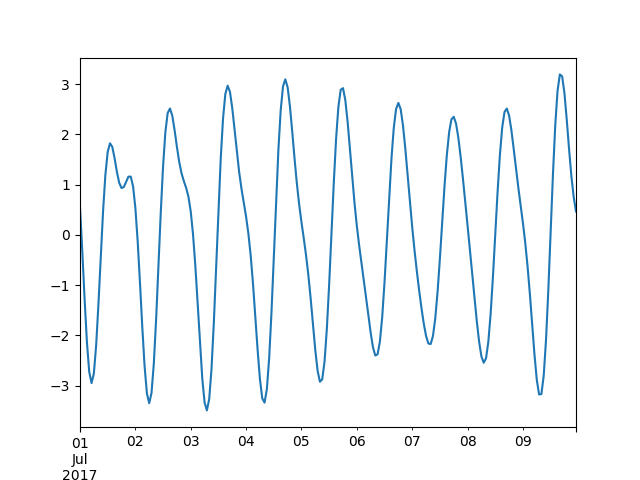

In [6]:
s = pd.Series(index=time, data=pred)
s.plot()